# Neural network to predict the outcome of "note" shots on FRC team 2713's 2024 robot
<img alt="a note" height="100" src="https://cdn.andymark.com/product_images/frc-2024-am-4999/6599718c4abebb01304612e9/zoom.jpg" width="100"/>

## License

```plaintext
Copyright 2024 Sidney Trzepacz

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
```

## Imports

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Data Loader

In [97]:
# Load csv
data_pd = pd.read_csv("../data/raycasting_normalised_angles.csv")

## Dataset preprocessing

In [98]:
data = data_pd.drop(['time', 'shooter_speed', 'elevator_height', 'vx', 'vy'], axis=1)
x = np.array(data.drop(['went_in'], axis=1))
y = np.array(data.drop(['x', 'y', 'pivot_angle', 'theta'], axis=1))

In [99]:
fld_x_scaler = MinMaxScaler()
fld_y_scaler = MinMaxScaler()
pivot_angle_scaler = MinMaxScaler()
theta_scaler = MinMaxScaler()

fld_x = x[:, 2].reshape(-1, 1)
fld_y = x[:, 3].reshape(-1, 1)
pivot_angle = x[:, 1].reshape(-1, 1)
theta = x[:, 0].reshape(-1, 1)

In [100]:
fld_x_scaler.fit(fld_x)
fld_y_scaler.fit(fld_y)
pivot_angle_scaler.fit(pivot_angle)
theta_scaler.fit(theta)

x[:, 0] = fld_x_scaler.transform(fld_x).reshape(-1)
x[:, 1] = fld_y_scaler.transform(fld_y).reshape(-1)
x[:, 2] = pivot_angle_scaler.transform(pivot_angle).reshape(-1)
x[:, 3] = theta_scaler.transform(theta).reshape(-1)

In [80]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio / (test_ratio + validation_ratio))

In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 128)               2176      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2385 (9.32 KB)
Trainable params: 2385 (9.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
hist = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
11719/11719 [==============================] - 9s 727us/step - loss: 0.0215 - accuracy: 0.9967 - val_loss: 0.0191 - val_accuracy: 0.9968
Epoch 2/200
11719/11719 [==============================] - 8s 693us/step - loss: 0.0188 - accuracy: 0.9968 - val_loss: 0.0192 - val_accuracy: 0.9968
Epoch 3/200
11719/11719 [==============================] - 8s 667us/step - loss: 0.0188 - accuracy: 0.9968 - val_loss: 0.0191 - val_accuracy: 0.9968
Epoch 4/200
11719/11719 [==============================] - 7s 638us/step - loss: 0.0187 - accuracy: 0.9968 - val_loss: 0.0190 - val_accuracy: 0.9968
Epoch 5/200
11719/11719 [==============================] - 8s 641us/step - loss: 0.0187 - accuracy: 0.9968 - val_loss: 0.0191 - val_accuracy: 0.9968
Epoch 6/200
11719/11719 [==============================] - 8s 677us/step - loss: 0.0186 - accuracy: 0.9968 - val_loss: 0.0198 - val_accuracy: 0.9968
Epoch 7/200
11719/11719 [==============================] - 8s 645us/step - loss: 0.0186 - accuracy: 0.9968

In [84]:
vacc, vloss = str(round(hist.history['val_accuracy'][-1], 3)), str(round(hist.history['val_loss'][-1], 3))

In [85]:
model.save('../models/raycasting_9_vacc-' + vacc + '_vloss-' + vloss + '.keras')

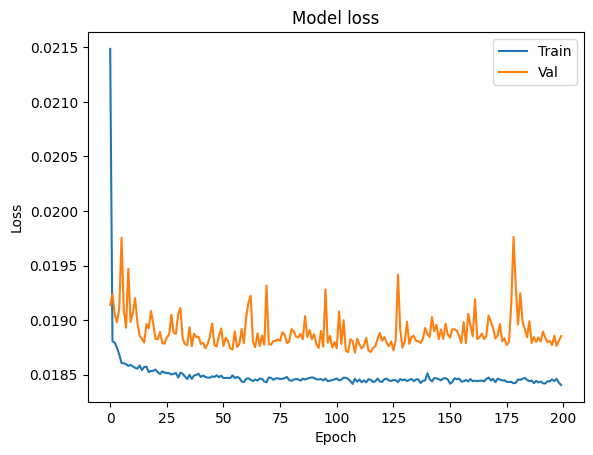

In [87]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')  # for geometry in [pcd, line_set, arrow]:

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

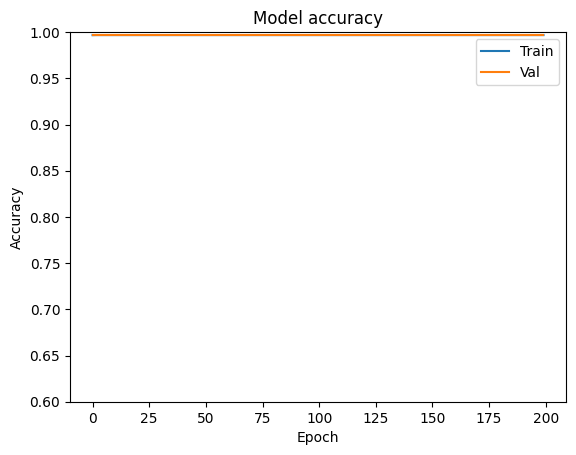

In [88]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.6, 1)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [89]:
model.evaluate(x_test, y_test)

1563/1563 [==============================] - 1s 469us/step - loss: 0.0176 - accuracy: 0.9969


[0.01762336492538452, 0.9969199895858765]

## Generate stationary presets

In [90]:
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [94]:
model.predict(np.array([x_train[278288]]))

1/1 [==============================] - 0s 11ms/step


array([[0.01115555]], dtype=float32)

In [93]:
x_train[278288]

array([0.84041792, 0.18915337, 0.00209997, 0.0023331 ])

In [105]:
def transform(x_pos, y_pos, pivot_angle_pos, theta_pos):
    transformed = [[fld_x_scaler.transform([[x_pos]])[0][0], fld_y_scaler.transform([[y_pos]])[0][0],
             pivot_angle_scaler.transform([[pivot_angle_pos]])[0][0], theta_scaler.transform([[theta_pos]])[0][0]]]
    assert np.max(transformed) <= 1 and np.min(transformed) >= 0
    return np.array(transformed)

In [148]:
map_size = 10

max_y = 323.22774925864445
max_x = 651.2475068039508

# Proportional to the size of the field
map_size_x = int(max_x / 10)
map_size_y = int(max_y / 10)

heat_map = [[0 for _ in range(map_size_x)] for _ in range(map_size_y)]

for idxy, i_y in enumerate(np.linspace(0.001, max_y, map_size_y)):
    for idxx, i_x in enumerate(np.linspace(0.001, max_x, map_size_x)):
        heat_map[idxy][idxx] = model.predict((transform(i_x, i_y, 45, 37.52586018440102)), verbose=0)[0][0]

In [149]:
heat_map = np.array(heat_map)
heat_map *= 10

In [150]:
heat_map = np.array(heat_map)
heat_map_img = np.array(heat_map * 255, dtype=np.uint8)
heat_map_img = np.array([[[0, i, 0] for i in row] for row in heat_map_img])

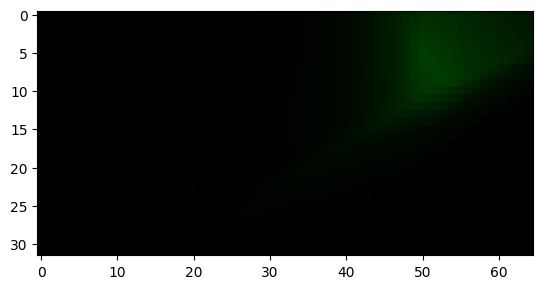

In [152]:
plt.imshow(heat_map_img, cmap='hot', interpolation='nearest')